In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [87]:
# current stock Interests: GPU, Car Scene with Tesla, Comparing companies such as Google, Microsoft, Amazon, and Meta, Streaming services such as Netflix etc...

# Good Guide: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#4.-What-was-the-correlation-between-different-stocks-closing-prices? 

# Kaggle Dataset Stock History Choices this week: 
# Nvidia = https://www.kaggle.com/datasets/kalilurrahman/nvidia-stock-data-latest-and-updated (might be too much and only goes up to 2021)
# Tesla = https://www.kaggle.com/datasets/muhammadibrahimqasmi/tesla-stock-insights-and-predictions/data 
# Google = https://www.kaggle.com/datasets/muhammadibrahimqasmi/google-stock-dataset 

# Possible list of Stock apis: https://patrickalphac.medium.com/stock-api-landscape-5c6e054ee631
# Yahoo Finance?

# Current Stocks API: https://finnhub.io 

# S&P 500 Current stocks daily updated: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data 

In [88]:
# can do baseline data analysis for now but is suggested to use up to date data next week around
# Yahoo Finance?
# how to update csv file with api data

In [89]:
# Nvidia Analysis, past 5 years
df_nvidia = pd.read_csv("NvidiaStock/NVDA.csv")

## Data Cleaning

In [90]:
df_nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,45.777500,46.202499,45.115002,45.117500,44.811085,35428000
1,2019-05-02,45.215000,46.217499,44.779999,45.797501,45.486473,39468400
2,2019-05-03,45.882500,45.982498,45.132500,45.752499,45.441776,33682400
3,2019-05-06,43.875000,45.084999,43.500000,44.962502,44.657139,42217600
4,2019-05-07,44.474998,44.474998,42.792500,43.277500,42.983582,55522000


In [91]:
df_nvidia.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,51220800
1255,2024-04-25,788.679993,833.229980,782.229980,826.320007,826.320007,42464100
1256,2024-04-26,838.179993,883.309998,833.869995,877.349976,877.349976,54667300
1257,2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
1258,2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36055200


In [92]:
# Maybe grab the Date and highest price it was at during each date?
df_nvidia.info()

# Open: Opening Price of a stock, first price when stock market opens
# High: Highest price the stock was at during trading day
# Low: Lowest price the stock was at duirng trading day
# Close: Closing price of a stock, final price before trades close
# adj Close: this is the closing price of a stock adjusted for factors such as dividends, stock splits, and other corporate actions that may affect the price
# Volume: The total number of shares or contracts traded during the period

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [93]:
df_nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Analysis

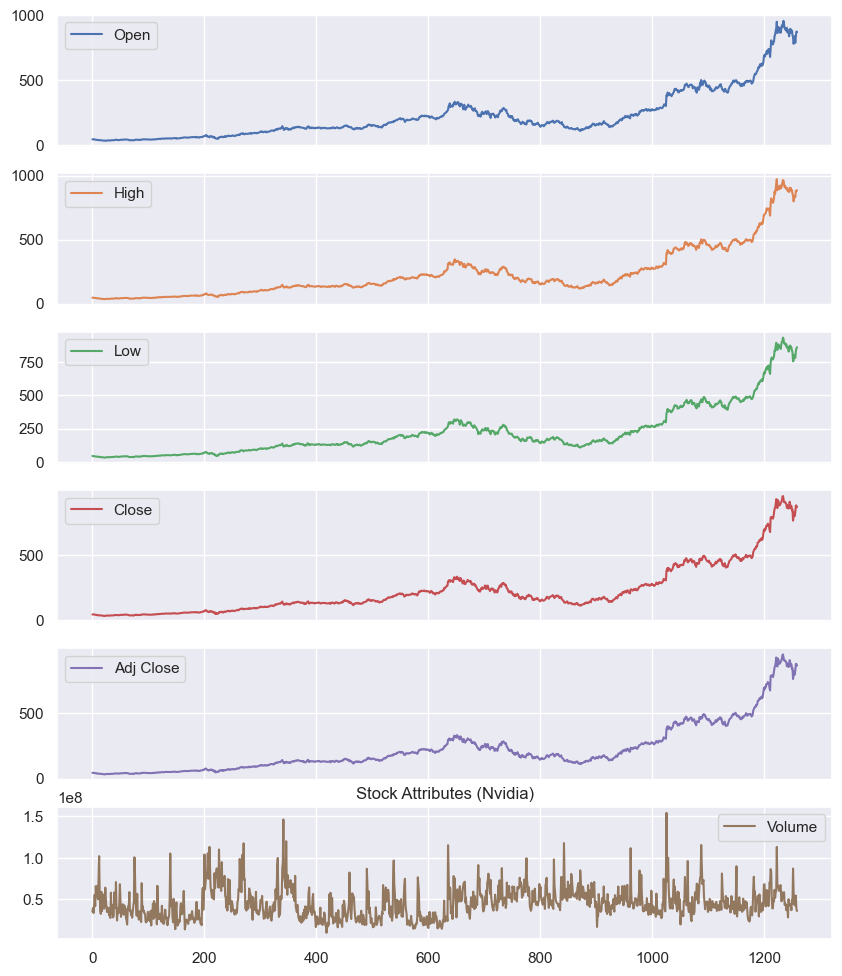

In [94]:
df_nvidia.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [95]:
fig = px.line(df_nvidia, x = 'Date', y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()
# I think the safest thing to do is focus on Adj Close as the major factor of prediction for now

In [96]:
fig = px.line(df_nvidia, x = 'Date', y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

<Axes: xlabel='Adj Close', ylabel='Volume'>

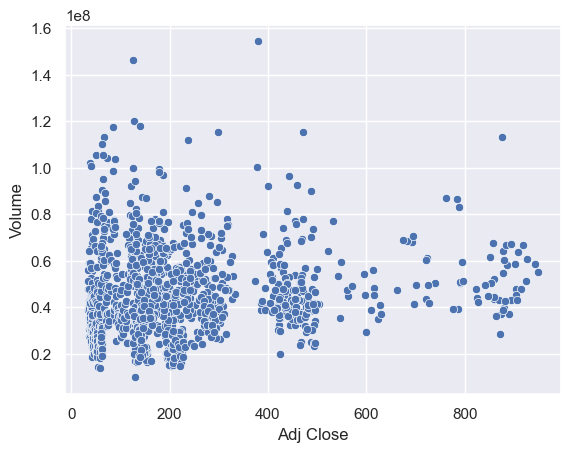

In [97]:
sns.scatterplot(df_nvidia, x='Adj Close', y='Volume')
# High volume of trades were in the lower area, but sudden rise mainly occurred during 2023
# Highest volume of purchases during a trading session happening when stock price was below 400 dollars, less trades seemed to occur after

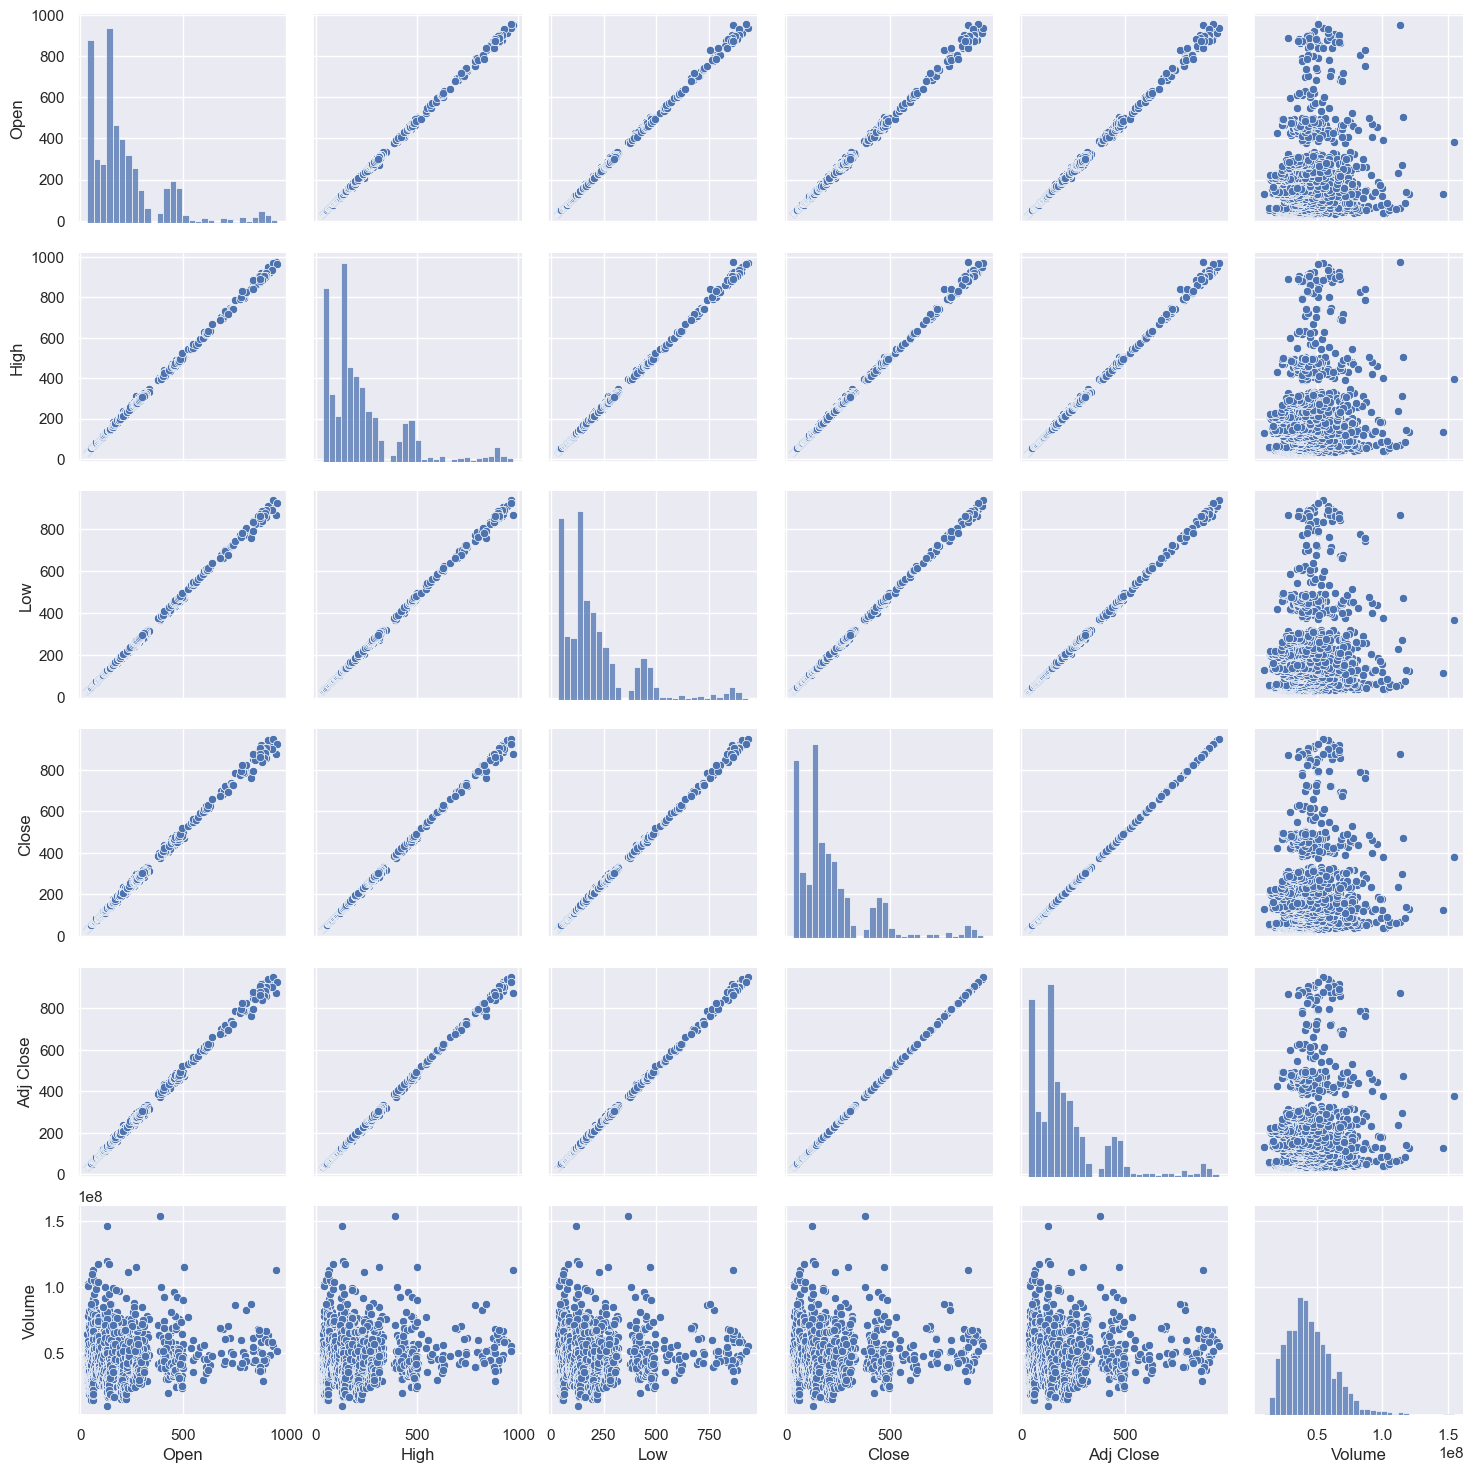

<Figure size 1000x1200 with 0 Axes>

In [98]:
sns.pairplot(df_nvidia)
plt.figure(figsize=(10,12))
plt.show()

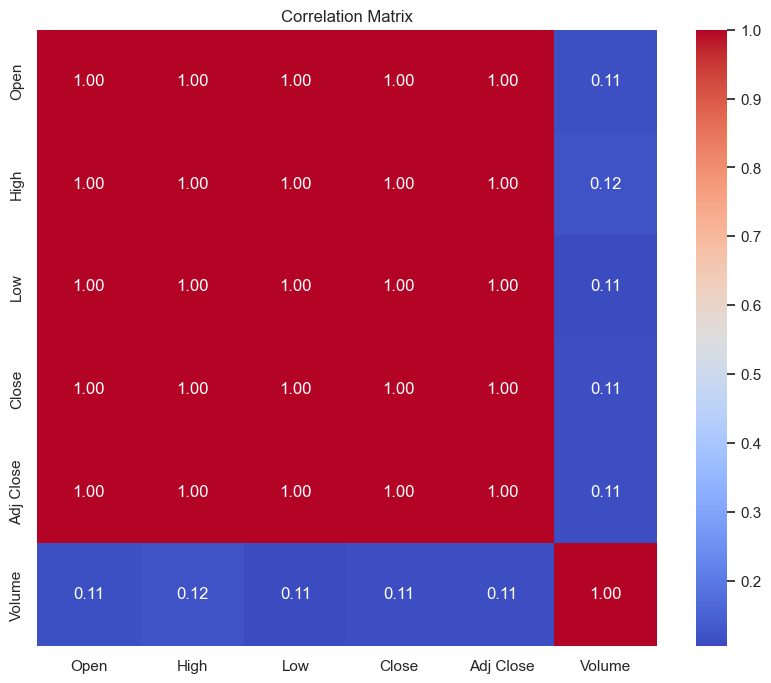

In [99]:
corr_matrix = df_nvidia.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing

In [100]:
df_nvidia['Date'] = pd.to_datetime(df_nvidia['Date'])

In [108]:
df_nvidia['Price Change'] = df_nvidia['High'] - df_nvidia['Low']

In [101]:
split_date = '2023-12-31'
validation_end_date = '2024-04-30'

#split data
train_data = df_nvidia[df_nvidia['Date'] <= split_date]
test_data = df_nvidia[df_nvidia['Date'] > split_date]

validation_data = df_nvidia[(df_nvidia['Date'] > split_date) & (df_nvidia['Date'] <= validation_end_date)]

## Prediction Model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# import keras_tuner as kt

import tensorflow as tf

from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [122]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_nvidia[['High', 'Low', 'Close', 'Adj Close', 'Volume']])
df_scaled = pd.DataFrame(scaled_features, columns=['High_scaled', 'Low_scaled', 'Close_scaled' ,'Adj Close_scaled', 'Volume_scaled'])
df = pd.concat([df_nvidia, df_scaled], axis=1)

In [123]:
X = df[['High', 'Low', 'Adj Close', 'Volume']]  # Features
y = df['Open']  # Target variable

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [126]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_train_selected = rfe.fit_transform(X_train, y_train)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [131]:
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print('Mean Squared Error:', mse)
# print('Root Mean Squared Error:', rmse)
# print('R-squared (R2) Score:', r2)


Mean Squared Error: 36467.93908237299
Root Mean Squared Error: 190.965806055359
R-squared (R2) Score: -0.04764364981565894
